# Final Model Selection and Evaluation
After selecting Random Forest model over Decision Tree model, in this notebook, we perform the model selection process between Logistic Regression model and Random Forest model. Then, we evaluate the final model using the testing set and do the prediction analysis.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay, auc, precision_recall_curve, PrecisionRecallDisplay, f1_score
import pickle
import matplotlib.image as mpimg
from IPython.display import Image

## Load the Validation and Testing Data

In [4]:
val_data = pd.read_csv('../data/val.csv')
test_data = pd.read_csv('../data/test.csv')
X_val = val_data.drop(labels = ['diagnosis','id'],axis = 1)
y_val = val_data['diagnosis']
X_test = test_data.drop(labels = ['diagnosis','id'],axis = 1)
y_test = test_data['diagnosis']

## Load Two Models from Disk

In [5]:
# load logistic model
model_lg = pickle.load(open('lg_model.sav', 'rb'))
#load random forest model
model_rf = pickle.load(open('rf_model.sav', 'rb'))

## Compare Metrics

We use validation data to obtain metrics that measure two models' performance. We used the following metrics:

- Accuracy: The accuray of a model is the fraction of correct predictions: $\frac{\text{correct predictions}}{\text{total number of data points}}$

- Confusion Matrix: A confusion matrix is a table that is used to visualize the performance of a classification algorithm, with four elements: True Positive, True Negative, False Positve (Type I Error), False Negative (Type II Error)

- ROC Curve: ROC curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. It shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR).

- Precision Recall Curve: The precision-recall curve is a graph with Precision values ($\frac{TP}{TP+FN}$) on the y-axis and Recall values ($\frac{TP}{TP+FP}$) on the x-axis. It shows the tradeoff between precision and recall for different threshold.

- F1 score: F1 score combines the precision and recall of a classifier into a single metric by taking their harmonic mean. It is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.

### Accuracy


In [6]:
# accuracy of decision tree model and logistic regression model
rf_score = model_rf.score(X_val, y_val)
lg_score = model_lg.score(X_val, y_val)
print("Random Forest Model Accuracy: ", rf_score)
print("Logistic Regression Accuracy: ", lg_score)

Random Forest Model Accuracy:  0.9587628865979382
Logistic Regression Accuracy:  0.9278350515463918


Random Forest Model does better than Logistic Regression in terms of accuracy.

### Confusion Matrix

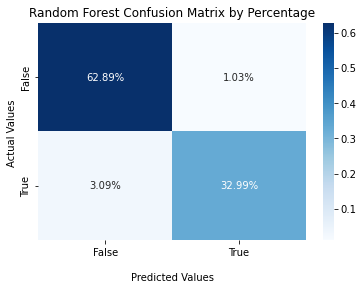

In [7]:
# Random Forest Condusion Matrix
Image('../figures/confusion_matrix_rf.png')

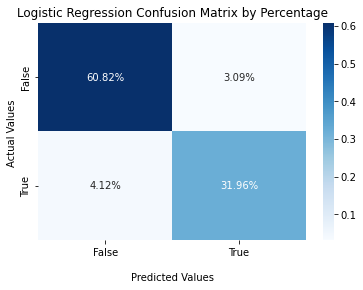

In [8]:
#Logistic Regression Confusion Matrix

cf_matrix_lg = confusion_matrix(y_val, model_lg.predict(X_val))

ax2 = sns.heatmap(cf_matrix_lg/np.sum(cf_matrix_lg), annot=True, 
            fmt='.2%', cmap='Blues')

ax2.set_title('Logistic Regression Confusion Matrix by Percentage');
ax2.set_xlabel('\nPredicted Values')
ax2.set_ylabel('Actual Values ');

ax2.xaxis.set_ticklabels(['False','True'])
ax2.yaxis.set_ticklabels(['False','True'])

plt.show();

From the above confusion matrices, Random Forest Model gets higher TPR and TNR as well as lower FPR and FNR than Logistic Regression. 

### ROC Curve

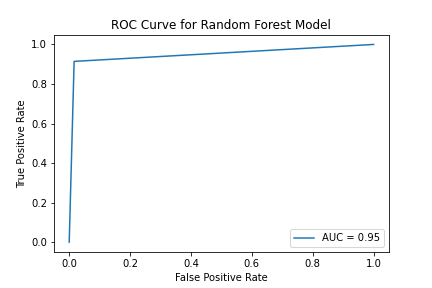

In [11]:
# Random Forest ROC Curve
Image('../figures/roc_curve_rf.png')

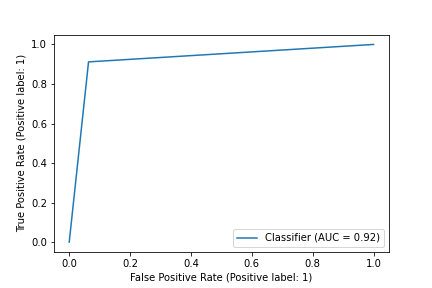

In [12]:
# Logistic Regression ROC Curve
Image('../figures/roc_curve_logistic.png')

Here we compare the AUC of two ROC curves. AUC stands for the area under an ROC curve, and it is a measure of the accuracy of a diagnostic test. AUC is the average true positive rate (average sensitivity) across all possible false positive rates. In general, higher
AUC values indicate better test performance. In our case, Random Forest model has a higher AUC than Logistic Model.

### Precision Recall Curve

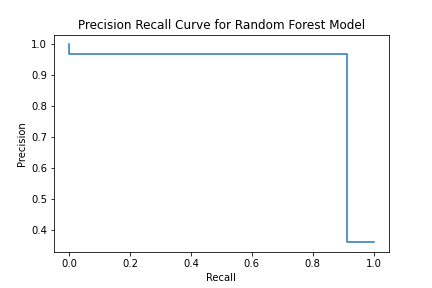

In [13]:
# Random Forest Precision Recall Curve
Image('../figures/precision_recall_curve_rf.png')

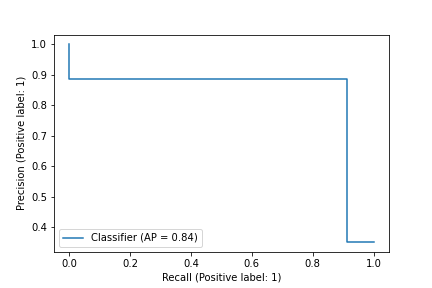

In [14]:
# Logistic Regression Precision Recall Curve
Image('../figures/precision_recall_curve_logistic.png')

We can observe that there is a larger area under Random Forest's Precision Recall Curve than Logistic Regression's curve. Random Forest Model has both high recall and high precision.


### F1 Score

In [16]:
f1_score_rf = f1_score(y_val, model_rf.predict(X_val))
f1_score_lg = f1_score(y_val, model_lg.predict(X_val))
print("Random Forest Model F1 Score: ", f1_score_rf)
print("Logistic Regression F1 Score: ", f1_score_lg)

Random Forest Model F1 Score:  0.9411764705882354
Logistic Regression F1 Score:  0.8985507246376812


Random Forest Model has a higher F1 score.

By comparing metrices, Random Forest Model performs better than Logisitc Regression in validation dataset. Therefore, we will select Random Forest Model as our final prediction model and use the test set to evaluate its performance.

## Evaluation 

In [20]:
y_pred_test = model_rf.predict(X_test)
# accuarcy
accuracy = model_rf.score(X_test, y_test)
print("The accuracy of our final model is: ", accuracy)

The accuracy of our final model is:  0.9534883720930233


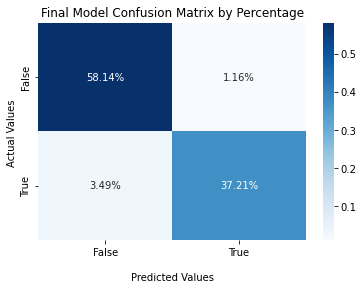

In [21]:
# confusion matrix
final_matrix = confusion_matrix(y_test, y_pred_test)

ax2 = sns.heatmap(final_matrix/np.sum(final_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax2.set_title('Final Model Confusion Matrix by Percentage');
ax2.set_xlabel('\nPredicted Values')
ax2.set_ylabel('Actual Values ');

ax2.xaxis.set_ticklabels(['False','True'])
ax2.yaxis.set_ticklabels(['False','True'])

plt.savefig('../figures/confusion_matrix_final.png', bbox_inches = 'tight')
plt.show()

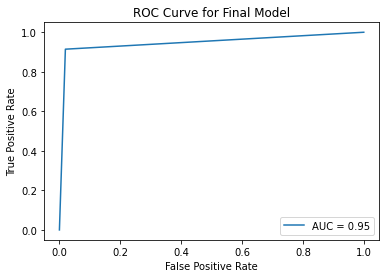

In [22]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.title("ROC Curve for Final Model")

plt.savefig('../figures/roc_curve_final.png')
plt.show();

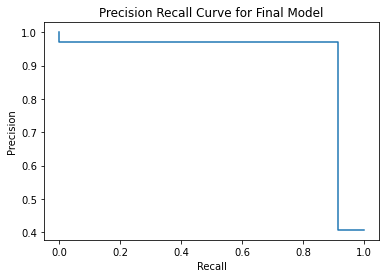

In [23]:
# Precision Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_test)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision Recall Curve for Final Model")

plt.savefig('../figures/precision_recall_curve_final.png')
plt.show();

In [24]:
# F1 score
f1_score_final = f1_score(y_test, y_pred_test)
print("The F1 socre of our final model is: ", f1_score_final)

The F1 socre of our final model is:  0.9411764705882354


Overall, we are able to build a prediction model that has high accuracy and balances precision and recall. One notable thing of our model is that it has a relatively higher False Negative Rate than False Positive Rate, which means it is more likely to fail to identifiy a patient with  malignancy. In future studies, we might focus on how to lower the FNR when building the predictive model.  